To work with a large dataset in Google Colab, you can connect your Google Drive to the Colab environment. By doing so, you can upload your dataset to your Google Drive and access it directly from Colab without the need for manual uploading

In [ ]:
from sklearn.metrics import matthews_corrcoef, f1_score , precision_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Cloud Storage
from google.cloud import storage
storage_client = storage.Client(project='YOUR PROJECT ID')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset folders
train_path = '/content/drive/MyDrive/data/chest_xray/train'
valid_path = '/content/drive/MyDrive/data/chest_xray/val'
test_path = '/content/drive/MyDrive/data/chest_xray/test'


# **Loading the data from the folder**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Define the image dimensions and batch size
image_size = (32, 32)
batch_size = 32

# Create the ImageDataGenerator and specify the preprocessing options
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training dataset
train_dataset = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # set to 'categorical' for multi-class classification
    shuffle=True
)

# Load and preprocess the validation dataset
val_dataset = datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load and preprocess the test dataset
test_dataset = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 5217 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


split the labels and the data from dataset

In [ ]:
val_data, val_labels = val_dataset.next()

In [ ]:
data, labels = train_dataset.next()

In [ ]:
test_data, test_labels = test_dataset.next()

Preprocessing step for the dataset including ( save the data and the labels in a numpy type and form a dataframe with columns of data and one column of labels then we drop the nan values from the dataframe and scaling the data) this step is not nessecary but it allows us to save the whole data in single file.cvs and it combike the whole datast with train and test and val and we can use this file to resplit the data into test and train and validation sets


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
def preprocessing(dataset):
    # Initialize empty lists for data and labels
    data_list = []
    labels_list = []

    # Iterate over the dataset and store the data and labels
    for i in range(len(dataset)):
        data, labels = dataset[i]
        data_list.extend(data)
        labels_list.extend(labels)

    # Create a DataFrame
    df = pd.DataFrame({
        'data': data_list,
        'labels': labels_list
    })
    df.dropna(inplace=True)
    df_encoded = pd.get_dummies(df, columns=['labels'])


    # Assuming 'df' is the DataFrame containing the image pixel values

    data = np.array([np.array(item) for item in df_encoded['data']])

    data = data.reshape(data.shape[0], -1)
    #Feature Scaling:#Scaling the features can help improve the performance and convergence of certain machine learning algorithms. Common scaling
    #techniques include min-max scaling and standardization.
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    X = df['data']
    y = df['labels']
    # Assuming 'labels' is the array containing the corresponding labels for each image
    df_scaled = pd.DataFrame(scaled_data)
    df_scaled['labels'] = y
    return df_scaled



In [ ]:
df_val=preprocessing(val_dataset)


In [ ]:
df_test=preprocessing(test_dataset)

In [ ]:

df_train=preprocessing(train_dataset)


combining the whole data

In [ ]:
df = pd.concat([df_train, df_test, df_val], axis=0)
#df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined DataFrame
df.reset_index(drop=True, inplace=True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,-0.751945,-0.751945,-0.751945,-0.545257,-0.545257,-0.545257,-0.740742,-0.740742,-0.740742,-0.684311,...,-0.662444,-0.662444,-0.662444,-0.084343,-0.084343,-0.084343,0.182877,0.182877,0.182877,1.0
1,-0.481194,-0.481194,-0.481194,-0.687742,-0.687742,-0.687742,-1.029019,-1.029019,-1.029019,-0.832139,...,-0.244134,-0.244134,-0.244134,0.199591,0.199591,0.199591,0.115883,0.115883,0.115883,1.0
2,1.916890,1.916890,1.916890,0.149353,0.149353,0.149353,2.988849,2.988849,2.988849,-0.409773,...,-0.871599,-0.871599,-0.871599,-0.327714,-0.327714,-0.327714,1.053806,1.053806,1.053806,1.0
3,-0.887321,-0.887321,-0.887321,-0.295910,-0.295910,-0.295910,0.106073,0.106073,0.106073,1.089627,...,-1.133043,-1.133043,-1.133043,-0.692771,-0.692771,-0.692771,-0.509400,-0.509400,-0.509400,0.0
4,-0.152424,-0.152424,-0.152424,0.042490,0.042490,0.042490,0.142108,0.142108,0.142108,1.385284,...,-0.854170,-0.854170,-0.854170,-0.307433,-0.307433,-0.307433,0.205209,0.205209,0.205209,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,-0.795248,-0.795248,-0.795248,-0.238150,-0.238150,-0.238150,0.427178,0.427178,0.427178,0.540515,...,0.893925,0.893925,0.893925,-0.560454,-0.560454,-0.560454,-0.399004,-0.399004,-0.399004,1.0
5853,-0.824634,-0.824634,-0.824634,0.415062,0.415062,0.415062,0.506838,0.506838,0.506838,0.726345,...,-0.558237,-0.558237,-0.558237,-0.511983,-0.511983,-0.511983,-0.399004,-0.399004,-0.399004,1.0
5854,-0.971562,-0.971562,-0.971562,-1.299620,-1.299620,-1.299620,-0.767725,-0.767725,-0.767725,-0.946125,...,-0.518452,-0.518452,-0.518452,2.153962,2.153962,2.153962,3.109359,3.109359,3.109359,1.0
5855,0.556490,0.556490,0.556490,0.224542,0.224542,0.224542,2.848846,2.848846,2.848846,2.455993,...,-0.717378,-0.717378,-0.717378,-0.511983,-0.511983,-0.511983,-0.399004,-0.399004,-0.399004,1.0


saving the data in a file

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'output' containing the desired output
df.to_csv('df.csv', index=False)


visualizing the structure of the data and check for the imbalance


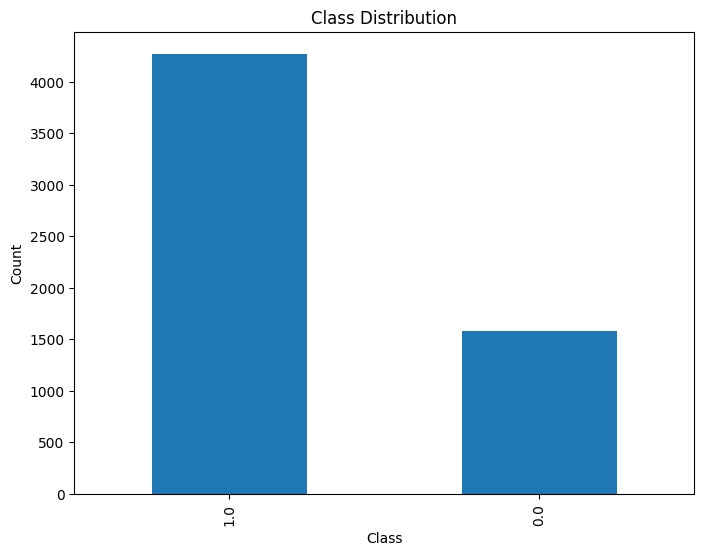

Normal=0 , pneumonia=1 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a DataFrame called 'df' with a column 'labels' representing the class labels

# Calculate class counts
class_counts = df['labels'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()
print("Normal=0 , pneumonia=1 ")


from the chart above we notice that the data is not balanced

Fixing the imbalance by using RandomOverSampler()


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming df is the DataFrame containing the dataset

# Separate the features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler()

# Apply oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)



In [ ]:
#X_resampled

In [ ]:
# Create the new DataFrame 'df_fixed'
df_fixed = pd.DataFrame(X_resampled, columns=X.columns)
df_fixed['label'] = y_resampled



<ipython-input-18-b6e0d0246693>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fixed['label'] = y_resampled


In [ ]:
#df_fixed

visualizing the impact of using the  RandomOverSampler() and the dataset become balanced

Text(0.5, 1.0, 'Class Distribution After Fixing Imbalance')

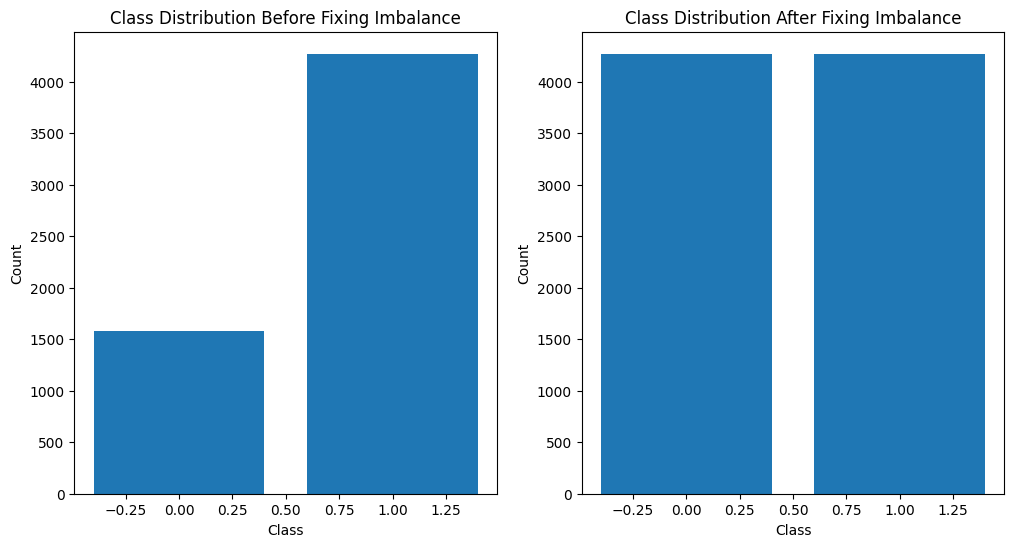

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate class counts before and after fixing imbalance
class_counts_before = df['labels'].value_counts()
class_counts_after = df_fixed['label'].value_counts()

# Create subplots for before and after plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot class distribution before fixing imbalance
axes[0].bar(class_counts_before.index, class_counts_before.values)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution Before Fixing Imbalance')

# Plot class distribution after fixing imbalance
axes[1].bar(class_counts_after.index, class_counts_after.values)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Class Distribution After Fixing Imbalance')


Visualizing the data

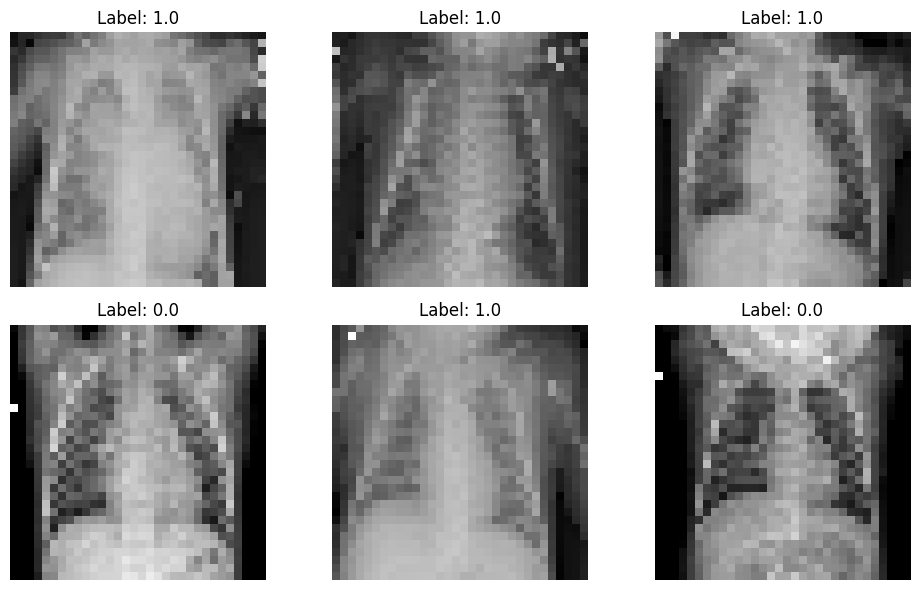

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is the NumPy array containing the image data
# Assuming 'labels' is the list containing the corresponding labels for each image

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Iterate over the axes and images to plot them
for i, ax in enumerate(axes.flat):
    # Select an image to visualize
    image = data[i]

    # Convert the image data to float format
    image = image.astype(float)

    # Plot the image
    ax.imshow(image)
    ax.axis('off')  # Remove axis ticks and labels
    ax.set_title(f"Label: {labels[i]}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()




In [ ]:

x = df_fixed.iloc[:, :-1]
Y = df_fixed.iloc[:, -1]


### **PCA & classical ml classifiers ** in the balanced dataset


applying pca and the split the dataset for training and testing

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 1: Perform PCA on the data
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(x)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)


tunning the hypereparameter using grid search for sVM model to find the best hyperparameter

please try not to run this it will take lots of time.

In [ ]:
$from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the range of hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Split the data into training and validation sets

# Create an SVM model
svm = SVC()

# Set up the grid search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and corresponding model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Retrain the model using the best hyperparameters
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the validation set
accuracy = best_model.score(X_test, y_test)


In [ ]:
print("accuracy: ", accuracy)
print(best_params)

Best Parameter for SVM :C=10, gamma=10, kernel='rbf'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Applying many classifier (KNeighborsClassifier ,LogisticRegression
 ,DecisionTreeClassifier
,RandomForestClassifier
 Support vector machine)

In [ ]:
#making an instance of each algorithm
knn = KNeighborsClassifier(n_neighbors=10)
log_reg  = LogisticRegression()
dtc  = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC(C=10, gamma=10, kernel='rbf')


In [ ]:
#fitting each model using X_train and y_train
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=10, gamma=10)

In [ ]:
#scoring each model
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))
print('Logistic Regression accuracy score is: ' + str(log_reg.score(X_test, y_test)))
print('Decision Tree Classifier accuracy score is: ' + str(dtc.score(X_test, y_test)))
print('Random forests Classifier accuracy score is: ' + str(rfc.score(X_test, y_test)))
print('Support Vector Machine Classifier accuracy score is: ' + str(svm.score(X_test, y_test)))

KNN accuracy score is: 0.7380116959064328
Logistic Regression accuracy score is: 0.7152046783625731
Decision Tree Classifier accuracy score is: 0.8514619883040936
Random forests Classifier accuracy score is: 0.8573099415204678
Support Vector Machine Classifier accuracy score is: 0.9198830409356725


from the result above the best performance among the previous classifers is SVM which score 0.919 and the worse classifier is Logistic Regression

In [ ]:
#making predictions for each model
knn_predcited = knn.predict(X_test)
log_reg_predcited = log_reg.predict(X_test)
dtc_predcited = dtc.predict(X_test)
rfc_predcited = rfc.predict(X_test)
svm_predcited = svm.predict(X_test)

In [ ]:
#function to plot the confusion matrix for each model
def plot_cm(predictions, y_test, title):
  labels = ['Normal', 'Pnuemonia']
  cm = confusion_matrix(y_test,predictions)
  cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
  plt.figure(figsize = (7,7))
  plt.title(title)
  sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.show()

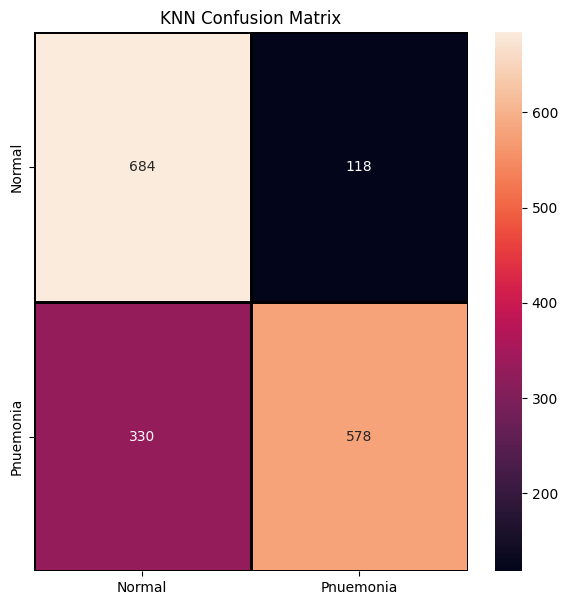

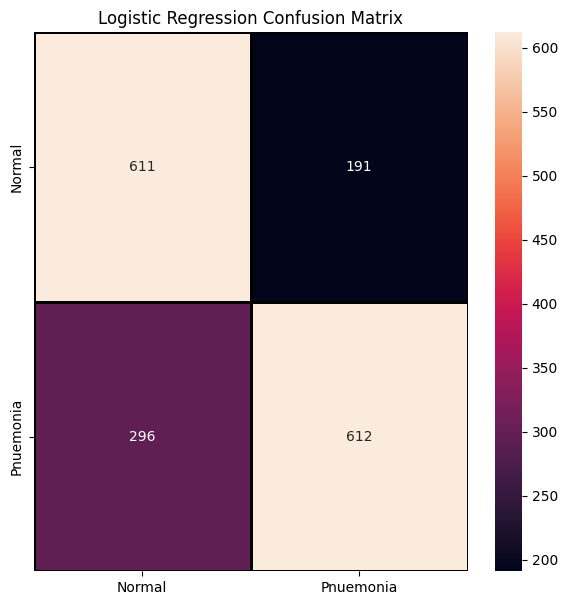

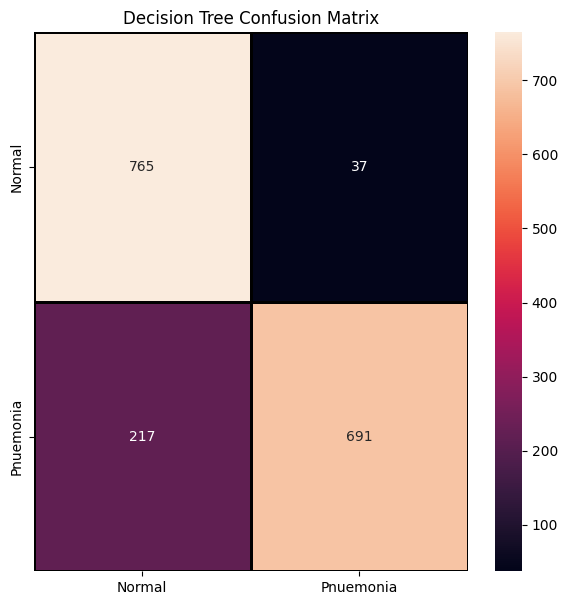

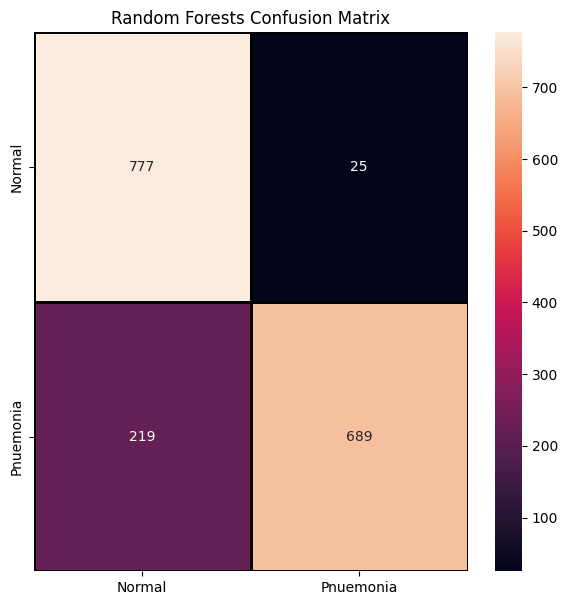

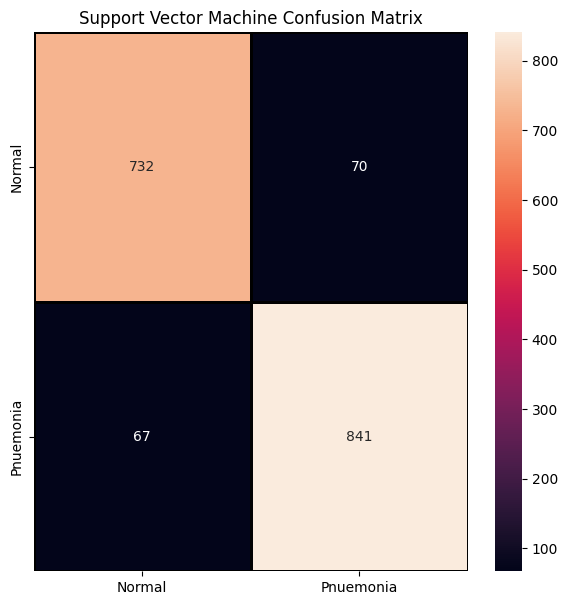

In [ ]:
#plot confusion matrix for each model

plot_cm(knn_predcited, y_test, 'KNN Confusion Matrix')

plot_cm(log_reg_predcited, y_test, 'Logistic Regression Confusion Matrix')

plot_cm(dtc_predcited, y_test, 'Decision Tree Confusion Matrix')

plot_cm(rfc_predcited, y_test, 'Random Forests Confusion Matrix')

plot_cm(svm_predcited, y_test, 'Support Vector Machine Confusion Matrix')

In [ ]:
!pip install keras-tuner


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

<ipython-input-32-faf0bbded06d>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


X_train and y_train: Training data and labels (64% of the original data)

X_val and y_val: Validation data and labels (16% of the original data)

X_test and y_test: Test data and labels (20% of the original data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## **Imbalanced dataset **

In [ ]:
X_train.shape

(3748, 3072)

In [ ]:
# Normalize the data
x_train = np.array(X_train) / 255
x_val = np.array(X_val) / 255
x_test = np.array(X_test) / 255

In [ ]:
x_train.shape

(3748, 3072)

In [ ]:
# resize data for deep learning
img_size=32
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [ ]:
y_train.shape

(3748,)

In [ ]:
y_train.shape

(3748,)

# **Using classical machine learning without pca **


In [ ]:
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=10, gamma=10)

In [ ]:
#scoring each model
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))
print('Logistic Regression accuracy score is: ' + str(log_reg.score(X_test, y_test)))
print('Decision Tree Classifier accuracy score is: ' + str(dtc.score(X_test, y_test)))
print('Random forests Classifier accuracy score is: ' + str(rfc.score(X_test, y_test)))
print('Support Vector Machine Classifier accuracy score is: ' + str(svm.score(X_test, y_test)))

KNN accuracy score is: 0.9163822525597269
Logistic Regression accuracy score is: 0.9172354948805461
Decision Tree Classifier accuracy score is: 0.85580204778157
Random forests Classifier accuracy score is: 0.9428327645051194
Support Vector Machine Classifier accuracy score is: 0.7534129692832765


based in the previous result it shows that Random forest outperformes the other classifier but we can't rely on the accuracy scores to evaluate the performannce of the classifiers since the dataset is imbalanced so we check the other matrices (MCC , prescicon)

In [ ]:
knn_predcited = knn.predict(X_test)
log_reg_predcited = log_reg.predict(X_test)
dtc_predcited = dtc.predict(X_test)
rfc_predcited = rfc.predict(X_test)
svm_predcited = svm.predict(X_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
print ("SVM scores: ")
mcc_svm = matthews_corrcoef(svm_predcited, y_test)
f1_svm = f1_score(svm_predcited, y_test)
precision_svm = precision_score(svm_predcited, y_test)

print(f"MCC: {mcc_svm}")
print(f"F1 score: {f1_svm}")
print("Precision:", precision_svm)


SVM scores: 
MCC: 0.05096321834958275
F1 score: 0.859230394544569
Precision: 1.0


In [ ]:
print ("KNN scores: ")
mcc_knn = matthews_corrcoef(knn_predcited, y_test)
f1_knn = f1_score(knn_predcited, y_test)
precision_knn = precision_score(knn_predcited, y_test)

print(f"MCC: {mcc_knn}")
print(f"F1 score: {f1_knn}")
print("Precision:", precision_knn)


KNN scores: 
MCC: 0.7676012534620253
F1 score: 0.9466230936819173
Precision: 0.9852607709750567


In [ ]:
print ("logistic regression scores: ")
mcc_log = matthews_corrcoef(log_reg_predcited, y_test)
f1_log = f1_score(log_reg_predcited, y_test)
precision_log = precision_score(log_reg_predcited, y_test)

print(f"MCC: {mcc_log}")
print(f"F1 score: {f1_log}")
print("Precision:", precision_log)

logistic regression scores: 
MCC: 0.7760564761985016
F1 score: 0.9452286843591192
Precision: 0.9489795918367347


In [ ]:
print ("descion tree scores: ")
mcc_dtc = matthews_corrcoef(dtc_predcited, y_test)
f1_dtc = f1_score(dtc_predcited, y_test)
precision_dtc = precision_score(dtc_predcited, y_test)

print(f"MCC: {mcc_dtc}")
print(f"F1 score: {f1_dtc}")
print("Precision:", precision_dtc)

descion tree scores: 
MCC: 0.6150830410997605
F1 score: 0.9039226833428085
Precision: 0.9013605442176871


In [ ]:
print ("RFC scores: ")
mcc_rcf = matthews_corrcoef(rfc_predcited, y_test)
f1_rcf = f1_score(rfc_predcited, y_test)
precision_rcf = precision_score(rfc_predcited, y_test)

print(f"MCC: {mcc_rcf}")
print(f"F1 score: {f1_rcf}")
print("Precision:", precision_rcf)

RFC scores: 
MCC: 0.8432708833916157
F1 score: 0.9625907314349526
Precision: 0.9773242630385488


based on the mcc score the best classifier is random forest classifier

## **NEURAL NETWORK USING CNN**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
image_width=32
image_height=32
channels=3
num_classes=2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the CNN architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                            kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                            activation='relu',
                            input_shape=(image_width, image_height, channels)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='cnn_hyperparameter_search'
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Get the best model and summary of hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model.summary()
print(best_hyperparameters.values)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 160)               2007200   
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                        

In [ ]:
best_model = build_model(best_hyperparameters)
best_model.compile(optimizer=keras.optimizers.Adam(best_hyperparameters['learning_rate']),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



Epoch 1/10
118/118 [==============================] - 12s 95ms/step - loss: 0.3885 - accuracy: 0.8404 - val_loss: 0.2200 - val_accuracy: 0.9072
Epoch 2/10
118/118 [==============================] - 11s 91ms/step - loss: 0.2338 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9221
Epoch 3/10
118/118 [==============================] - 9s 73ms/step - loss: 0.2047 - accuracy: 0.9194 - val_loss: 0.1747 - val_accuracy: 0.9317
Epoch 4/10
118/118 [==============================] - 15s 126ms/step - loss: 0.1948 - accuracy: 0.9250 - val_loss: 0.1787 - val_accuracy: 0.9392
Epoch 5/10
118/118 [==============================] - 11s 91ms/step - loss: 0.1834 - accuracy: 0.9317 - val_loss: 0.1759 - val_accuracy: 0.9328
Epoch 6/10
118/118 [==============================] - 11s 91ms/step - loss: 0.1742 - accuracy: 0.9336 - val_loss: 0.1660 - val_accuracy: 0.9413
Epoch 7/10
118/118 [==============================] - 8s 71ms/step - loss: 0.1757 - accuracy: 0.9317 - val_loss: 0.1458 - val_accuracy: 

In [ ]:
from sklearn.metrics import matthews_corrcoef, f1_score , precision_score

# ...

# After training your model and making predictions
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)

print(f"MCC: {mcc}")
print(f"F1 score: {f1}")
print("Precision:", precision)


37/37 [==============================] - 1s 16ms/step
MCC: 0.8532656609049755
F1 score: 0.9646662927650028
Precision: 0.9544950055493896


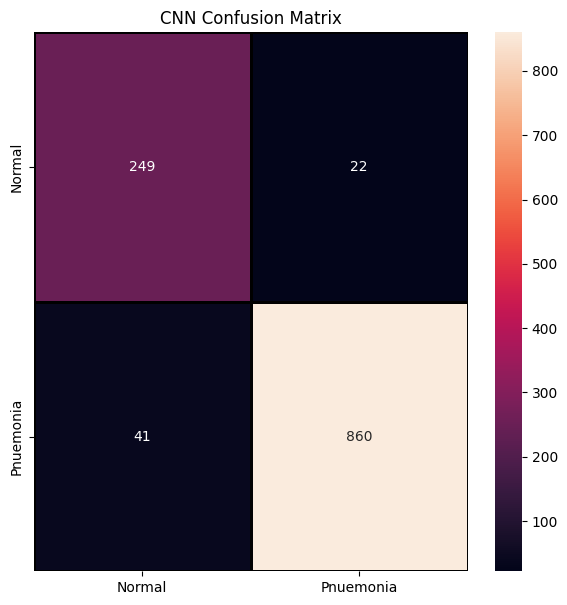

In [ ]:
plot_cm(y_test_classes, y_pred_classes,'CNN Confusion Matrix')